In [134]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [135]:
data = pd.read_csv("Fish.csv")

In [136]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [137]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


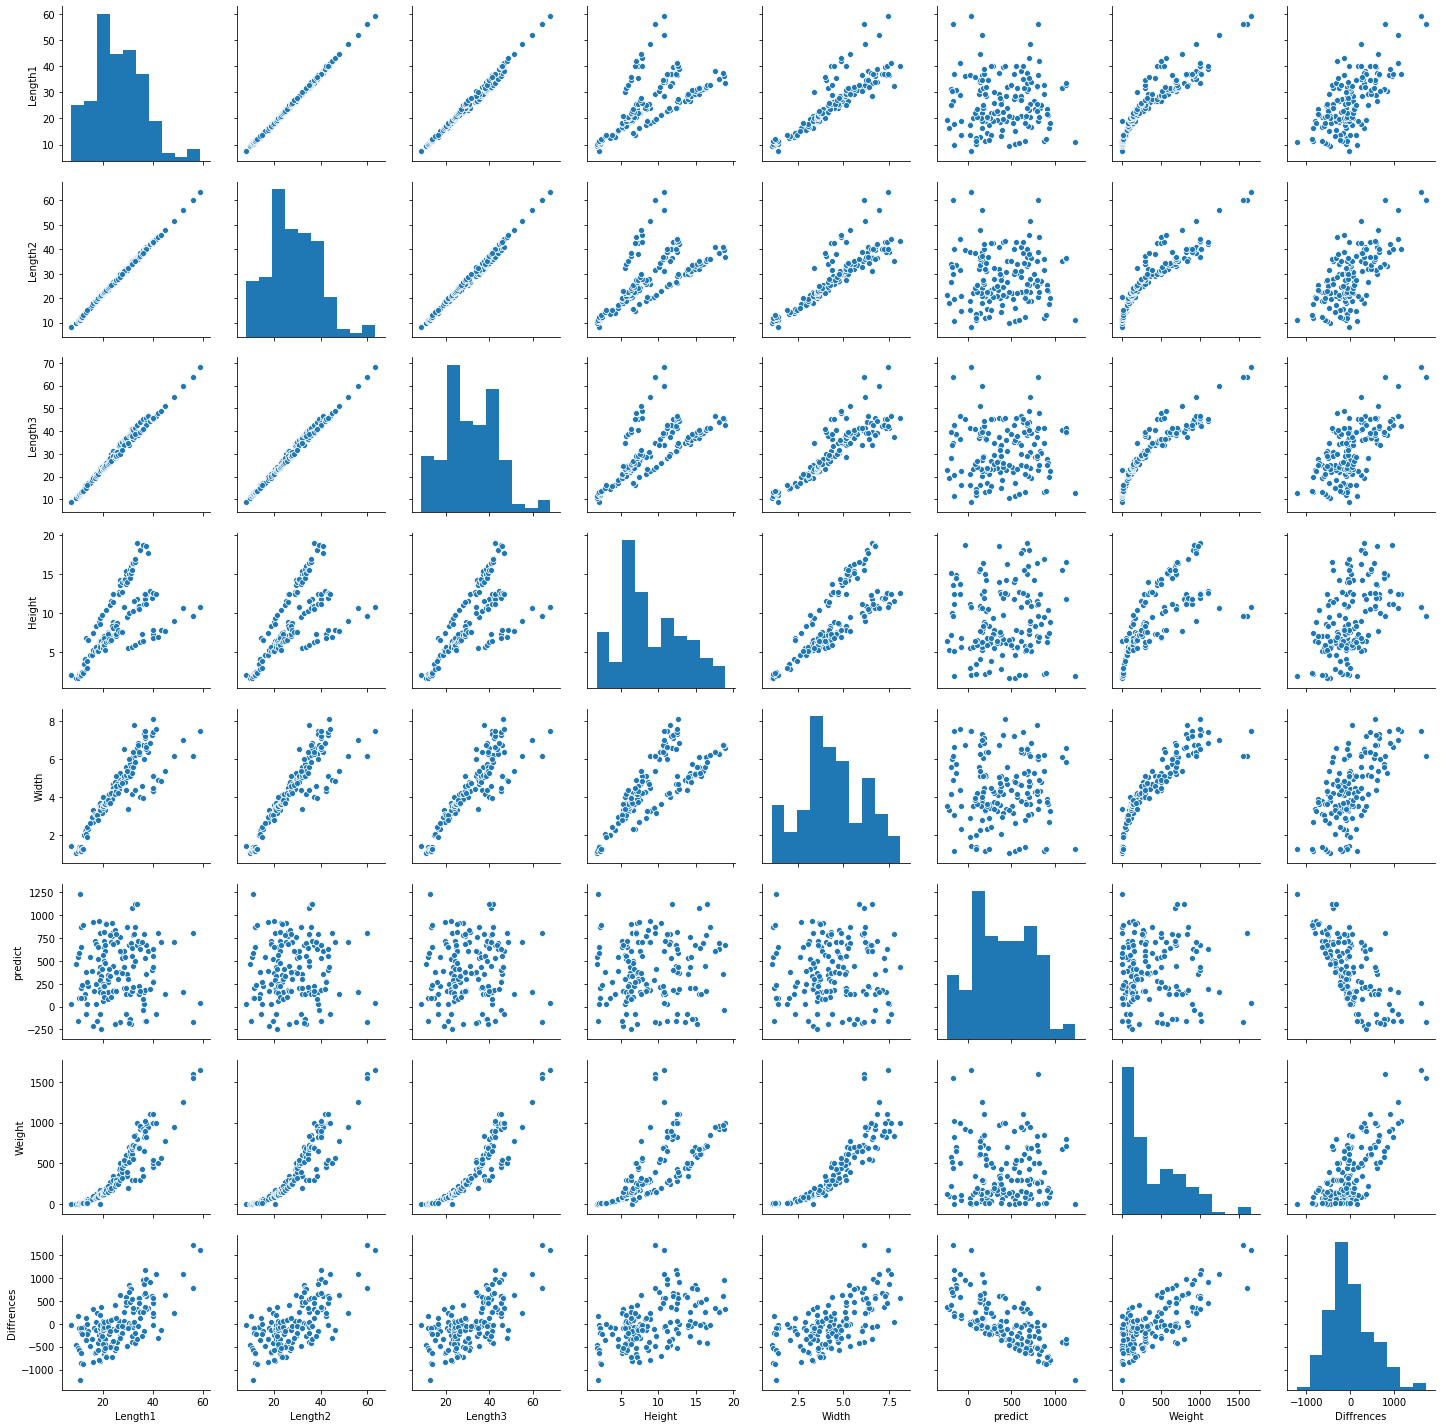

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(data)

In [138]:
y = data['Weight']

In [139]:
data = data.drop(["Species", "Weight"], axis=1)

In [140]:
data

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [141]:
data.isnull().sum()

Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [142]:
y.isnull().sum()

0

In [143]:
model = LinearRegression()


In [144]:
x_trian, x_test, y_train, y_test = train_test_split(data,y, test_size=0.2)


In [145]:
model.fit(x_trian, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
ypre=model.predict(x_trian)
yprec=model.predict(x_test)

In [147]:
model.score(x_trian,ypre)

1.0

In [148]:
data['predict']= np.concatenate((ypre, yprec), axis=0)
data['Weight']=y
data['Diffrences'] = y-data['predict']

In [149]:
data

,Length1,Length2,Length3,Height,Width,predict,Weight,Diffrences
0,23.2,25.4,30.0,11.5200,4.0200,704.222046,242.0,-462.222046
1,24.0,26.3,31.2,12.4800,4.3056,822.071713,290.0,-532.071713
2,23.9,26.5,31.1,12.3778,4.6961,446.291562,340.0,-106.291562
3,26.3,29.0,33.5,12.7300,4.4555,371.680156,363.0,-8.680156
4,26.5,29.0,34.0,12.4440,5.1340,376.722850,430.0,53.277150
...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,651.473337,12.2,-639.273337
155,11.7,12.4,13.5,2.4300,1.2690,240.491662,13.4,-227.091662
156,12.1,13.0,13.8,2.2770,1.2558,894.774557,12.2,-882.574557
157,13.2,14.3,15.2,2.8728,2.0672,375.182985,19.7,-355.482985


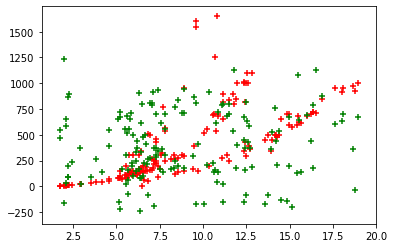

In [150]:
import matplotlib.pyplot as plt
#y.shape
plt.scatter(data.Height,y, marker="+", color="red")
plt.scatter(data.Height,data.predict, marker="+", color="green")

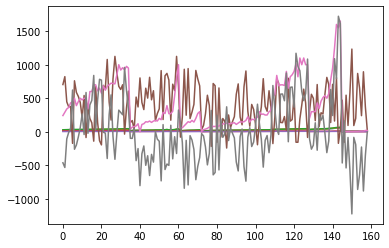

In [151]:
pi=plt.plot(data)